In [8]:
# encoding=utf-8
from __future__ import print_function
import os
import re
import time

import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageDraw, ImageFont, ImageOps

In [2]:
%matplotlib notebook

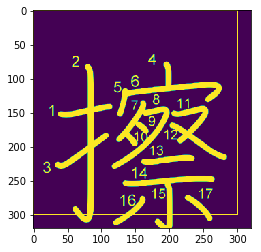

In [6]:
kanji = u'擦'

IMAGE_SIZE = (320, 320)

image = Image.new('L', size=IMAGE_SIZE, color=0)

draw = ImageDraw.Draw(image)

font_path = '../truetype_fonts/KanjiStrokeOrders.ttf'
font_size = 300
font = ImageFont.truetype(font_path, font_size)

offset = (0, 0)
text_color = 255
draw.text(offset, kanji, fill=text_color, font=font)

draw.line(
    [
        offset,
        (offset[0], offset[1] + font_size),
        (offset[0] + font_size, offset[1] + font_size),
        (offset[0] + font_size, offset[1]),
        offset
    ], fill=text_color)

plt.imshow(image)

In [7]:
image.save('unfit_character_sample.png', 'PNG')

## Invert image

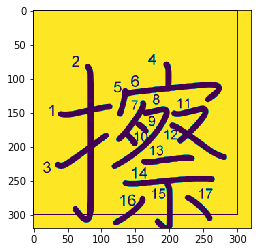

In [9]:
inv_img = ImageOps.invert(image)
plt.imshow(inv_img)

## Semi-pipeline function

In [3]:
def draw_kanji(kanji_text, font_path, side_length=320, background_color=0, text_color=255):
    
    pad_side_length = int(side_length * 2)
    canvas = Image.new('L', (pad_side_length, pad_side_length), color=0)
    ctx = ImageDraw.Draw(canvas)
    
    for i in range(4):
        font_size = int(((6+i)/10) * side_length)
        font = ImageFont.truetype(font_path, font_size)
        pad_offset = (pad_side_length - font_size) / 2
        ctx.text((pad_offset, pad_offset), kanji_text, fill=text_color, font=font)
        
        for rotate_degree in range(-10, 15, 5):
            center_x = canvas.width / 2
            center_y = canvas.height / 2
            rotate_img = canvas.rotate(rotate_degree, center=(center_x, center_y))
            
            np_img = np.array(rotate_img)
            kanji_idx = np_img.nonzero()
            
            # If the font does not support this character,
            # it will draw either none or a square
            # The try block below is to deal with blank image
            try:
                max_x = kanji_idx[1][np.argmax(kanji_idx[1])]
                min_x = kanji_idx[1][np.argmin(kanji_idx[1])]

                max_y = kanji_idx[0][np.argmax(kanji_idx[0])]
                min_y = kanji_idx[0][np.argmin(kanji_idx[0])]
            except:
                print(f"Error at kanji={kanji_text}, font_path={font_path}, font_size={font_size}, rotate_degree={rotate_degree}")
                return None
            
            actual_width = max_x - min_x
            actual_height = max_y - min_y
            
            offset_x = min_x - ((side_length - actual_width) / 2)
            offset_y = min_y - ((side_length - actual_height) / 2)
            
            semi_final_img = rotate_img.crop((offset_x, offset_y, offset_x + side_length, offset_y + side_length))
            
            # Translate image method
            
#             stride = side_length / 10
#             idx = 0
#             while True:
#                 x_vector = min_x - (stride * idx)
                
#                 if x_vector < 0:
#                     break
                    
#                 x_transform_vectors.append(x_vector)
#                 x_transform_vectors.append(-x_vector)
               
#                 idx += 1
            
            
#             idx = 0
#             while True:
#                 y_vector = min_y - (stride * idx)
                
#                 if y_vector < 0:
#                     break
                
#                 y_transform_vectors.append(y_vector)
#                 y_transform_vectors.append(-y_vector)
             
#                 idx += 1
            
#             for x_vector in x_transform_vectors:
#                 for y_vector in y_transform_vectors:
                # un-implement translation transform
            
#             return semi_final_img

In [4]:
KANJI_LIST = [
    '亜', '哀', '挨', '愛', '曖', '悪', '握', '圧', '扱', '宛', '嵐', '安', '案', '暗', '以', '衣', '位', '囲', '医', '依', '委', '威', '為', '畏', '胃', '尉', '異', '移', '萎', '偉', '椅', '彙', '意', '違', '維',
    '慰', '遺', '緯', '域', '育', '一', '壱', '逸', '茨', '芋', '引', '印', '因', '咽', '姻', '員', '院', '淫', '陰', '飲', '隠', '韻', '右', '宇', '羽', '雨', '唄', '鬱', '畝', '浦', '運', '雲', '永', '泳', '英',
    '映', '栄', '営', '詠', '影', '鋭', '衛', '易', '疫', '益', '液', '駅', '悦', '越', '謁', '閲', '円', '延', '沿', '炎', '怨', '宴', '媛', '援', '園', '煙', '猿', '遠', '鉛', '塩', '演', '縁', '艶', '汚', '王',
    '凹', '央', '応', '往', '押', '旺', '欧', '殴', '桜', '翁', '奥', '横', '岡', '屋', '億', '憶', '臆', '虞', '乙', '俺', '卸', '音', '恩', '温', '穏', '下', '化', '火', '加', '可', '仮', '何', '花', '佳', '価',
    '果', '河', '苛', '科', '架', '夏', '家', '荷', '華', '菓', '貨', '渦', '過', '嫁', '暇', '禍', '靴', '寡', '歌', '箇', '稼', '課', '蚊', '牙', '瓦', '我', '画', '芽', '賀', '雅', '餓', '介', '回', '灰', '会',
    '快', '戒', '改', '怪', '拐', '悔', '海', '界', '皆', '械', '絵', '開', '階', '塊', '楷', '解', '潰', '壊', '懐', '諧', '貝', '外', '劾', '害', '崖', '涯', '街', '慨', '蓋', '該', '概', '骸', '垣', '柿', '各',
    '角', '拡', '革', '格', '核', '殻', '郭', '覚', '較', '隔', '閣', '確', '獲', '嚇', '穫', '学', '岳', '楽', '額', '顎', '掛', '潟', '括', '活', '喝', '渇', '割', '葛', '滑', '褐', '轄', '且', '株', '釜', '鎌',
    '刈', '干', '刊', '甘', '汗', '缶', '完', '肝', '官', '冠', '巻', '看', '陥', '乾', '勘', '患', '貫', '寒', '喚', '堪', '換', '敢', '棺', '款', '間', '閑', '勧', '寛', '幹', '感', '漢', '慣', '管', '関', '歓',
    '監', '緩', '憾', '還', '館', '環', '簡', '観', '韓', '艦', '鑑', '丸', '含', '岸', '岩', '玩', '眼', '頑', '顔', '願', '企', '伎', '危', '机', '気', '岐', '希', '忌', '汽', '奇', '祈', '季', '紀', '軌', '既',
    '記', '起', '飢', '鬼', '帰', '基', '寄', '規', '亀', '喜', '幾', '揮', '期', '棋', '貴', '棄', '毀', '旗', '器', '畿', '輝', '機', '騎', '技', '宜', '偽', '欺', '義', '疑', '儀', '戯', '擬', '犠', '議', '菊',
    '吉', '喫', '詰', '却', '客', '脚', '逆', '虐', '九', '久', '及', '弓', '丘', '旧', '休', '吸', '朽', '臼', '求', '究', '泣', '急', '級', '糾', '宮', '救', '球', '給', '嗅', '窮', '牛', '去', '巨', '居', '拒',
    '拠', '挙', '虚', '許', '距', '魚', '御', '漁', '凶', '共', '叫', '狂', '京', '享', '供', '協', '況', '峡', '挟', '狭', '恐', '恭', '胸', '脅', '強', '教', '郷', '境', '橋', '矯', '鏡', '競', '響', '驚', '仰',
    '暁', '業', '凝', '曲', '局', '極', '玉', '巾', '斤', '均', '近', '金', '菌', '勤', '琴', '筋', '僅', '禁', '緊', '錦', '謹', '襟', '吟', '銀', '区', '句', '苦', '駆', '具', '惧', '愚', '空', '偶', '遇', '隅',
    '串', '屈', '掘', '窟', '熊', '繰', '君', '訓', '勲', '薫', '軍', '郡', '群', '兄', '刑', '形', '系', '径', '茎', '係', '型', '契', '計', '恵', '啓', '掲', '渓', '経', '蛍', '敬', '景', '軽', '傾', '携', '継',
    '詣', '慶', '憬', '稽', '憩', '警', '鶏', '芸', '迎', '鯨', '隙', '劇', '撃', '激', '桁', '欠', '穴', '血', '決', '結', '傑', '潔', '月', '犬', '件', '見', '券', '肩', '建', '研', '県', '倹', '兼', '剣', '拳',
    '軒', '健', '険', '圏', '堅', '検', '嫌', '献', '絹', '遣', '権', '憲', '賢', '謙', '鍵', '繭', '顕', '験', '懸', '元', '幻', '玄', '言', '弦', '限', '原', '現', '舷', '減', '源', '厳', '己', '戸', '古', '呼',
    '固', '股', '虎', '孤', '弧', '故', '枯', '個', '庫', '湖', '雇', '誇', '鼓', '錮', '顧', '五', '互', '午', '呉', '後', '娯', '悟', '碁', '語', '誤', '護', '口', '工', '公', '勾', '孔', '功', '巧', '広', '甲',
    '交', '光', '向', '后', '好', '江', '考', '行', '坑', '孝', '抗', '攻', '更', '効', '幸', '拘', '肯', '侯', '厚', '恒', '洪', '皇', '紅', '荒', '郊', '香', '候', '校', '耕', '航', '貢', '降', '高', '康', '控',
    '梗', '黄', '喉', '慌', '港', '硬', '絞', '項', '溝', '鉱', '構', '綱', '酵', '稿', '興', '衡', '鋼', '講', '購', '乞', '号', '合', '拷', '剛', '傲', '豪', '克', '告', '谷', '刻', '国', '黒', '穀', '酷', '獄',
    '骨', '駒', '込', '頃', '今', '困', '昆', '恨', '根', '婚', '混', '痕', '紺', '魂', '墾', '懇', '左', '佐', '沙', '査', '砂', '唆', '差', '詐', '鎖', '座', '挫', '才', '再', '災', '妻', '采', '砕', '宰', '栽',
    '彩', '採', '済', '祭', '斎', '細', '菜', '最', '裁', '債', '催', '塞', '歳', '載', '際', '埼', '在', '材', '剤', '財', '罪', '崎', '作', '削', '昨', '柵', '索', '策', '酢', '搾', '錯', '咲', '冊', '札', '刷',
    '刹', '拶', '殺', '察', '撮', '擦', '雑', '皿', '三', '山', '参', '桟', '蚕', '惨', '産', '傘', '散', '算', '酸', '賛', '残', '斬', '暫', '士', '子', '支', '止', '氏', '仕', '史', '司', '四', '市', '矢', '旨',
    '死', '糸', '至', '伺', '志', '私', '使', '刺', '始', '姉', '枝', '祉', '肢', '姿', '思', '指', '施', '師', '恣', '紙', '脂', '視', '紫', '詞', '歯', '嗣', '試', '詩', '資', '飼', '誌', '雌', '摯', '賜', '諮',
    '示', '字', '寺', '次', '耳', '自', '似', '児', '事', '侍', '治', '持', '時', '滋', '慈', '辞', '磁', '餌', '璽', '鹿', '式', '識', '軸', '七', '腕', '失', '室', '疾', '執', '湿', '嫉', '漆', '質', '実', '芝',
    '写', '社', '車', '舎', '者', '射', '捨', '赦', '斜', '煮', '遮', '謝', '邪', '蛇', '尺', '借', '酌', '釈', '爵', '若', '弱', '寂', '手', '主', '守', '朱', '取', '狩', '首', '殊', '珠', '酒', '腫', '種', '趣',
    '寿', '受', '呪', '授', '需', '儒', '樹', '収', '囚', '州', '舟', '秀', '周', '宗', '拾', '秋', '臭', '修', '袖', '終', '羞', '習', '週', '就', '衆', '集', '愁', '酬', '醜', '蹴', '襲', '十', '汁', '充', '住',
    '柔', '重', '従', '渋', '銃', '獣', '縦', '叔', '祝', '宿', '淑', '粛', '縮', '塾', '熟', '出', '述', '術', '俊', '春', '瞬', '旬', '巡', '盾', '准', '殉', '純', '循', '順', '準', '潤', '遵', '処', '初', '所',
    '書', '庶', '暑', '署', '緒', '諸', '女', '如', '助', '序', '叙', '徐', '除', '小', '升', '少', '召', '匠', '床', '抄', '肖', '尚', '招', '承', '昇', '松', '沼', '昭', '宵', '将', '消', '症', '祥', '称', '笑',
    '唱', '商', '渉', '章', '紹', '訟', '勝', '掌', '晶', '焼', '焦', '硝', '粧', '詔', '証', '象', '傷', '奨', '照', '詳', '彰', '障', '憧', '衝', '賞', '償', '礁', '鐘', '上', '丈', '冗', '条', '状', '乗', '城',
    '浄', '剰', '常', '情', '場', '畳', '蒸', '縄', '壌', '嬢', '錠', '譲', '醸', '色', '拭', '食', '植', '殖', '飾', '触', '嘱', '織', '職', '辱', '尻', '心', '申', '伸', '臣', '芯', '身', '辛', '侵', '信', '津',
    '神', '唇', '娠', '振', '浸', '真', '針', '深', '紳', '進', '森', '診', '寝', '慎', '新', '審', '震', '薪', '親', '人', '刃', '仁', '尽', '迅', '甚', '陣', '尋', '腎', '須', '図', '水', '吹', '垂', '炊', '帥',
    '粋', '衰', '推', '酔', '遂', '睡', '穂', '随', '髄', '枢', '崇', '数', '据', '杉', '裾', '寸', '瀬', '是', '井', '世', '正', '生', '成', '西', '声', '制', '姓', '征', '性', '青', '斉', '政', '星', '牲', '省',
    '凄', '逝', '清', '盛', '婿', '晴', '勢', '聖', '誠', '精', '製', '誓', '静', '請', '整', '醒', '税', '夕', '斥', '石', '赤', '昔', '析', '席', '脊', '隻', '惜', '戚', '責', '跡', '積', '績', '籍', '切', '折',
    '拙', '窃', '接', '設', '雪', '摂', '節', '説', '舌', '絶', '千', '川', '仙', '占', '先', '宣', '専', '泉', '浅', '洗', '染', '扇', '栓', '旋', '船', '戦', '煎', '羨', '腺', '詮', '践', '箋', '銭', '潜', '線',
    '遷', '選', '薦', '繊', '鮮', '全', '前', '善', '然', '禅', '漸', '膳', '繕', '狙', '阻', '祖', '租', '素', '措', '粗', '組', '疎', '訴', '塑', '遡', '礎', '双', '壮', '早', '争', '走', '奏', '相', '荘', '草',
    '送', '倉', '捜', '挿', '桑', '巣', '掃', '曹', '曽', '爽', '窓', '創', '喪', '痩', '葬', '装', '僧', '想', '層', '総', '遭', '槽', '踪', '操', '燥', '霜', '騒', '藻', '造', '像', '増', '憎', '蔵', '贈', '臓',
    '即', '束', '足', '促', '則', '息', '捉', '速', '側', '測', '俗', '族', '属', '賊', '続', '卒', '率', '存', '村', '孫', '尊', '損', '遜', '他', '多', '汰', '打', '妥', '唾', '堕', '惰', '駄', '太', '対', '体',
    '耐', '待', '怠', '胎', '退', '帯', '泰', '堆', '袋', '逮', '替', '貸', '隊', '滞', '態', '戴', '大', '代', '台', '第', '題', '滝', '宅', '択', '沢', '卓', '拓', '託', '濯', '諾', '濁', '但', '達', '脱', '奪',
    '棚', '誰', '丹', '旦', '担', '単', '炭', '胆', '探', '淡', '短', '嘆', '端', '綻', '誕', '鍛', '団', '男', '段', '断', '弾', '暖', '談', '壇', '地', '池', '知', '値', '恥', '致', '遅', '痴', '稚', '置', '緻',
    '竹', '畜', '逐', '蓄', '築', '秩', '窒', '茶', '着', '嫡', '中', '仲', '虫', '沖', '宙', '忠', '抽', '注', '昼', '柱', '衷', '酎', '鋳', '駐', '著', '貯', '丁', '弔', '庁', '兆', '町', '長', '挑', '帳', '張',
    '彫', '眺', '釣', '頂', '鳥', '朝', '貼', '超', '腸', '跳', '徴', '嘲', '潮', '澄', '調', '聴', '懲', '直', '勅', '捗', '沈', '珍', '朕', '陳', '賃', '鎮', '追', '椎', '墜', '通', '痛', '塚', '漬', '坪', '爪',
    '鶴', '低', '呈', '廷', '弟', '定', '底', '抵', '邸', '亭', '貞', '帝', '訂', '庭', '逓', '停', '偵', '堤', '提', '程', '艇', '締', '諦', '泥', '的', '笛', '摘', '滴', '適', '敵', '溺', '迭', '哲', '鉄', '徹',
    '撤', '天', '典', '店', '点', '展', '添', '転', '塡', '田', '伝', '殿', '電', '斗', '吐', '妬', '徒', '途', '都', '渡', '塗', '賭', '土', '奴', '努', '度', '怒', '刀', '冬', '灯', '当', '投', '豆', '東', '到',
    '逃', '倒', '凍', '唐', '島', '桃', '討', '透', '党', '悼', '盗', '陶', '塔', '搭', '棟', '湯', '痘', '登', '答', '等', '筒', '統', '稲', '踏', '糖', '頭', '謄', '藤', '闘', '騰', '同', '洞', '胴', '動', '堂',
    '童', '道', '働', '銅', '導', '瞳', '峠', '匿', '特', '得', '督', '徳', '篤', '毒', '独', '読', '栃', '凸', '突', '届', '屯', '豚', '頓', '貪', '鈍', '曇', '丼', '那', '奈', '内', '梨', '謎', '鍋', '南', '軟',
    '難', '二', '尼', '弐', '匂', '肉', '虹', '日', '入', '乳', '尿', '任', '妊', '忍', '認', '寧', '熱', '年', '念', '捻', '粘', '燃', '悩', '納', '能', '脳', '農', '濃', '把', '波', '派', '破', '覇', '馬', '婆',
    '罵', '拝', '杯', '背', '肺', '俳', '配', '排', '敗', '廃', '輩', '売', '倍', '梅', '培', '陪', '媒', '買', '賠', '白', '伯', '拍', '泊', '迫', '剝', '舶', '博', '薄', '麦', '漠', '縛', '爆', '箱', '箸', '畑',
    '肌', '八', '鉢', '発', '髪', '伐', '抜', '罰', '閥', '反', '半', '氾', '犯', '帆', '汎', '伴', '判', '坂', '阪', '板', '版', '班', '畔', '般', '販', '斑', '飯', '搬', '煩', '頒', '範', '繁', '藩', '晩', '番',
    '蛮', '盤', '比', '皮', '妃', '否', '批', '彼', '披', '肥', '非', '卑', '飛', '疲', '秘', '被', '悲', '扉', '費', '碑', '罷', '避', '尾', '眉', '美', '備', '微', '鼻', '膝', '肘', '匹', '必', '泌', '筆', '姫',
    '百', '氷', '表', '俵', '票', '評', '漂', '標', '苗', '秒', '病', '描', '猫', '品', '浜', '貧', '賓', '頻', '敏', '瓶', '不', '夫', '父', '付', '布', '扶', '府', '怖', '阜', '附', '訃', '負', '赴', '浮', '婦',
    '符', '富', '普', '腐', '敷', '膚', '賦', '譜', '侮', '武', '部', '舞', '封', '風', '伏', '服', '副', '幅', '復', '福', '腹', '複', '覆', '払', '沸', '仏', '物', '粉', '紛', '雰', '噴', '墳', '憤', '奮', '分',
    '文', '聞', '丙', '平', '兵', '併', '並', '柄', '陛', '閉', '塀', '幣', '弊', '蔽', '餅', '米', '壁', '璧', '癖', '別', '蔑', '片', '辺', '返', '変', '偏', '遍', '編', '弁', '便', '勉', '歩', '保', '哺', '捕',
    '補', '舗', '母', '募', '墓', '慕', '暮', '簿', '方', '包', '芳', '邦', '奉', '宝', '抱', '放', '法', '泡', '胞', '俸', '倣', '峰', '砲', '崩', '訪', '報', '蜂', '豊', '飽', '褒', '縫', '亡', '乏', '忙', '坊',
    '妨', '忘', '防', '房', '肪', '某', '冒', '剖', '紡', '望', '傍', '帽', '棒', '貿', '貌', '暴', '膨', '謀', '頰', '北', '木', '朴', '牧', '睦', '僕', '墨', '撲', '没', '勃', '堀', '本', '奔', '翻', '凡', '盆',
    '麻', '摩', '磨', '魔', '毎', '妹', '枚', '昧', '埋', '幕', '膜', '枕', '又', '末', '抹', '万', '満', '慢', '漫', '未', '味', '魅', '岬', '密', '蜜', '脈', '妙', '民', '眠', '矛', '務', '無', '夢', '霧', '娘',
    '名', '命', '明', '迷', '冥', '盟', '銘', '鳴', '滅', '免', '面', '綿', '麺', '茂', '模', '毛', '妄', '盲', '耗', '猛', '網', '目', '黙', '門', '紋', '問', '冶', '夜', '野', '弥', '厄', '役', '約', '訳', '薬',
    '躍', '闇', '由', '油', '喩', '愉', '諭', '輸', '癒', '唯', '友', '有', '勇', '幽', '悠', '郵', '湧', '猶', '裕', '遊', '雄', '誘', '憂', '融', '優', '与', '予', '余', '誉', '預', '幼', '用', '羊', '妖', '洋',
    '要', '容', '庸', '揚', '揺', '葉', '陽', '溶', '腰', '様', '瘍', '踊', '窯', '養', '擁', '謡', '曜', '抑', '沃', '浴', '欲', '翌', '翼', '拉', '裸', '羅', '来', '雷', '頼', '絡', '落', '酪', '辣', '乱', '卵',
    '覧', '濫', '藍', '欄', '吏', '利', '里', '理', '痢', '裏', '履', '璃', '離', '陸', '立', '律', '慄', '略', '柳', '流', '留', '竜', '粒', '隆', '硫', '侶', '旅', '虜', '慮', '了', '両', '良', '料', '涼', '猟',
    '陵', '量', '僚', '領', '寮', '療', '瞭', '糧', '力', '緑', '林', '厘', '倫', '輪', '隣', '臨', '瑠', '涙', '累', '塁', '類', '令', '礼', '冷', '励', '戻', '例', '鈴', '零', '霊', '隷', '齢', '麗', '暦', '歴',
    '列', '劣', '烈', '裂', '恋', '連', '廉', '練', '錬', '呂', '炉', '賂', '路', '露', '老', '労', '弄', '郎', '朗', '浪', '廊', '楼', '漏', '籠', '六', '録', '麓', '論', '和', '話', '賄', '脇', '惑', '枠', '湾',
]

In [6]:
font_dirs = ['../truetype_fonts', '../opentype_fonts']

for kanji_text in KANJI_LIST:
    
    kanji_start = time.time()
    kanji_img_count = 0

    for font_dir in font_dirs:
        font_files = os.listdir(font_dir)
        for font_file in font_files:

            font_path = os.path.join(font_dir, font_file)
            draw_kanji(kanji_text, font_path)

Error at kanji=亜, font_path=../truetype_fonts/FC-Flower.ttf, font_size=192, rotate_degree=-10
Error at kanji=亜, font_path=../opentype_fonts/YOzRNGij.otf, font_size=192, rotate_degree=-10
Error at kanji=亜, font_path=../opentype_fonts/YOzBNGij.otf, font_size=192, rotate_degree=-10
亜: 6700 take 2.20s
Error at kanji=哀, font_path=../truetype_fonts/FC-Flower.ttf, font_size=192, rotate_degree=-10
Error at kanji=哀, font_path=../opentype_fonts/YOzRNGij.otf, font_size=192, rotate_degree=-10
Error at kanji=哀, font_path=../opentype_fonts/YOzBNGij.otf, font_size=192, rotate_degree=-10
哀: 6700 take 2.26s
Error at kanji=挨, font_path=../truetype_fonts/FC-Flower.ttf, font_size=192, rotate_degree=-10
Error at kanji=挨, font_path=../truetype_fonts/KAWAIITEGAKIMOJI.ttf, font_size=192, rotate_degree=-10
Error at kanji=挨, font_path=../opentype_fonts/YOzRNGij.otf, font_size=192, rotate_degree=-10
Error at kanji=挨, font_path=../opentype_fonts/YOzBNGij.otf, font_size=192, rotate_degree=-10
挨: 6600 take 2.41s
Er

KeyboardInterrupt: 

In [ ]:
def strokeRect(x1, y1, x2, y2, ctx, color=255):
    ctx.line([
        (x1, y1),
        (x1, y2),
        (x2, y2),
        (x2, y1),
        (x1, y1)
    ], fill=color)

In [ ]:
def draw_grid(image, line_num=10, horizontal=True, vertical=True, color=255):
    ctx = ImageDraw.Draw(image)
    
    if horizontal:
        stride = image.height / line_num
        for i in range(line_num):
            y = i * stride
            ctx.line([(0, y), (image.width, y)], fill=color)
            
    if vertical:
        stride = image.width / line_num
        for i in range(line_num):
            x = i * stride
            ctx.line([(x, 0), (x, image.height)], fill=color)
            
    return image